In [1]:
%matplotlib inline
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('master_location.pkl')

In [3]:
df.head()

,address,area,date,location,time,type,latitude,longitude
4333,174X MAHANI LOOP,KALIHI,2016-11-07 16:51:13,,4:51:13 PM,MOTOR VEHICLE COLLISION,21.351571,-157.857829
4332,KAWAIAHAO ST&SOUTH; ST,HONOLULU,2016-11-07 16:54:37,,4:54:37 PM,MOTOR VEHICLE COLLISION - TOWED,21.302850,-157.857111
4331,316X HARDING AVE,KAIMUKI,2016-11-07 16:56:45,,4:56:45 PM,MOTOR VEHICLE COLLISION,21.286176,-157.809424
4330,KILAUEA AVE&MALIA; ST,WAIALAE,2016-11-07 17:02:02,,5:02:02 PM,MOTOR VEHICLE COLLISION,21.280513,-157.784640
4329,H2N WAHIAWA OFF,MILILANI,2016-11-07 17:03:05,H2N WAHIAWA OFF,5:03:05 PM,TRAFFIC NUISANCE OR PARKING VIOLATION,21.472379,-158.010142


In [8]:
diff = df.tail(1).iloc[0]['date'] - df.head(1).iloc[0]['date']
print('Range of data: {}'.format(diff))

Range of data: 21 days 23:45:59


In [68]:
df['hour'] = df.date.apply(lambda d: d.hour) 
df['dayofweek'] = df.date.apply(lambda d: d.dayofweek)
df['dayofweek_name'] = df.date.apply(lambda d: d.weekday_name)
df['day'] = df.date.apply(lambda d: d.day)
df['count'] = 1

In [69]:
types = set(df.type)
print('Types of Accidents: {}'.format(types))
df.head()

Types of Accidents: {'HAZARDOUS DRIVER', 'STALLED/HAZARDOUS VEHICLE', 'TRAFFIC INCIDENT - NO COLLISION', 'TRAFFIC NUISANCE OR PARKING VIOLATION', 'MOTOR VEHICLE COLLISION', 'TRAFFIC SIGNAL PROBLEM', 'MOTOR VEHICLE COLLISION - TOWED'}


,address,area,date,location,time,type,latitude,longitude,hour,day_of_week,day,count,dayofweek,dayofweek_name
4333,174X MAHANI LOOP,KALIHI,2016-11-07 16:51:13,,4:51:13 PM,MOTOR VEHICLE COLLISION,21.351571,-157.857829,16,0,7,1,0,Monday
4332,KAWAIAHAO ST&SOUTH; ST,HONOLULU,2016-11-07 16:54:37,,4:54:37 PM,MOTOR VEHICLE COLLISION - TOWED,21.302850,-157.857111,16,0,7,1,0,Monday
4331,316X HARDING AVE,KAIMUKI,2016-11-07 16:56:45,,4:56:45 PM,MOTOR VEHICLE COLLISION,21.286176,-157.809424,16,0,7,1,0,Monday
4330,KILAUEA AVE&MALIA; ST,WAIALAE,2016-11-07 17:02:02,,5:02:02 PM,MOTOR VEHICLE COLLISION,21.280513,-157.784640,17,0,7,1,0,Monday
4329,H2N WAHIAWA OFF,MILILANI,2016-11-07 17:03:05,H2N WAHIAWA OFF,5:03:05 PM,TRAFFIC NUISANCE OR PARKING VIOLATION,21.472379,-158.010142,17,0,7,1,0,Monday


In [126]:
max(collisionTypes.loc[t][['count']].values)

array([13])

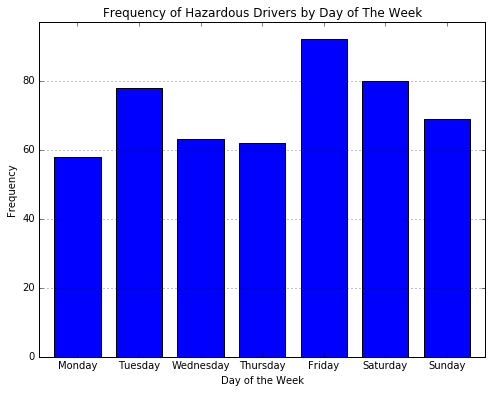

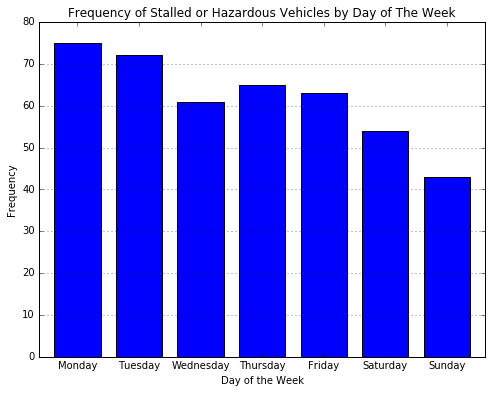

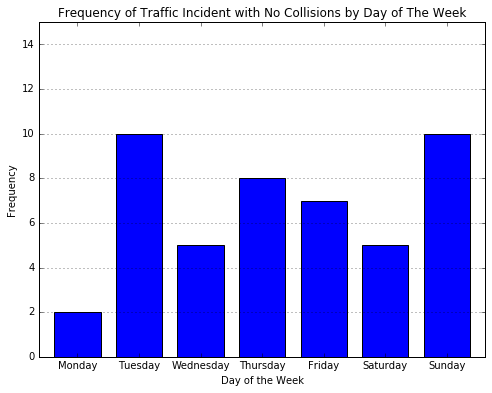

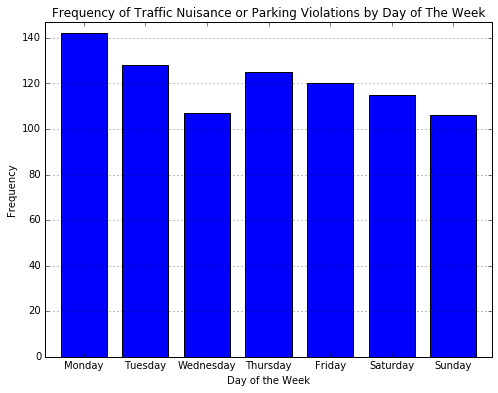

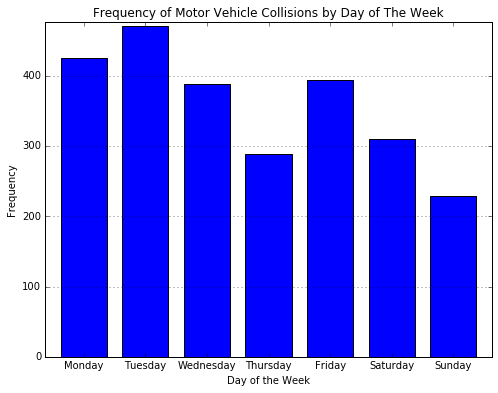

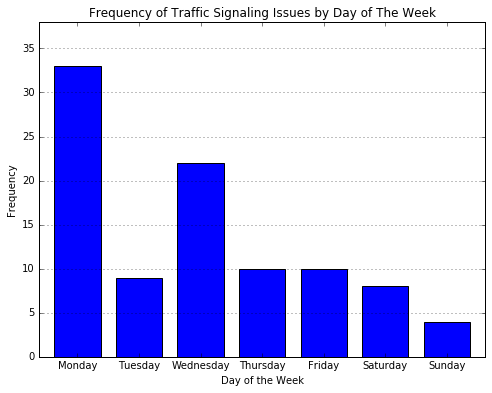

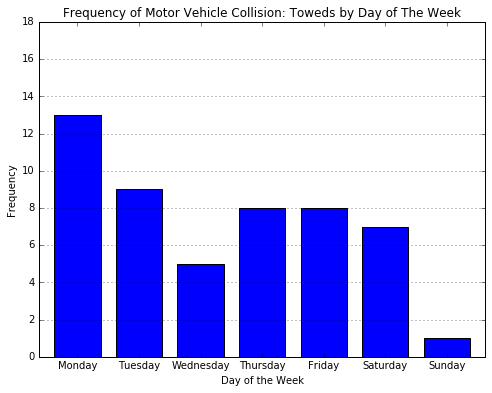

In [139]:
mapping_day = {
        '0':'Monday',
        '1':'Tuesday',
        '2':'Wednesday',
        '3':'Thursday',
        '4':'Friday',
        '5':'Saturday',
        '6':'Sunday'
}

mapping_type = {'HAZARDOUS DRIVER':'Hazardous Driver', 
                'STALLED/HAZARDOUS VEHICLE':'Stalled or Hazardous Vehicle', 
                'TRAFFIC INCIDENT - NO COLLISION':'Traffic Incident with No Collision', 
                'TRAFFIC NUISANCE OR PARKING VIOLATION':'Traffic Nuisance or Parking Violation', 
                'MOTOR VEHICLE COLLISION':'Motor Vehicle Collision', 
                'TRAFFIC SIGNAL PROBLEM':'Traffic Signaling Issue', 
                'MOTOR VEHICLE COLLISION - TOWED':'Motor Vehicle Collision: Towed'}
collisionTypes = df[['type','latitude','longitude','hour','dayofweek', 'dayofweek_name','day','count']].groupby(['type','dayofweek']).count()
collisionTypes
for t in types:
    ax = collisionTypes.loc[t][['count']].plot.bar(title = 'Frequency of ' + mapping_type[t] + 's by Day of The Week', legend = False, rot = 0, figsize=(8,6), width=0.75)
    days = [item.get_text() for item in ax.get_xticklabels()]
    labels = [mapping_day[day] for day in days]
    ax.set_xticklabels(labels)
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Frequency')
    ax.set_ylim(None, max(collisionTypes.loc[t][['count']].values) + 5)
    ax.yaxis.grid(True)
    fig = ax.get_figure()
    fig.savefig('graphs/' + mapping_type[t].replace(' ','') +'.png')

In [117]:
b.get_text()

'0'

In [ ]:

# dayofweek = df['day_of_week'].value_counts().sort_index()
dayofweek.plot.bar(title='Frequency of incidents by Day of the Week')